In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ls *.f

elasto_plasticity_scalar.f            elasto_plasticity_scalar_hardening.f


In [3]:
!gfortran elasto_plasticity_scalar_hardening.f -o elasto_plasticity_scalar_hardening

In [4]:
!./elasto_plasticity_scalar_hardening

 sig+dsig      F-H        H


In [5]:
!head -n 9 elasto_plasticity_scalar_hardening.txt
print('...')
!tail -n 3 elasto_plasticity_scalar_hardening.txt

   0.0000   1.0000  0.000000      0.00  0.000000  0.000000 0 0
   0.0200   1.0002  0.000200     40.00  0.000200  0.000000 0 0
   0.0400   1.0004  0.000400     79.99  0.000400  0.000000 0 0
   0.0600   1.0006  0.000600    119.98  0.000600  0.000000 0 0
   0.0800   1.0008  0.000800    159.95  0.000800  0.000000 0 0
   0.1000   1.0010  0.001000    199.92  0.001000  0.000000 1 1
   0.1200   1.0012  0.001199    200.00  0.001000  0.000199 1 1
   0.1400   1.0014  0.001399    211.88  0.001059  0.000340 1 1
   0.1600   1.0016  0.001599    213.58  0.001068  0.000531 1 1
...
   9.9400   0.9826 -0.017543   -255.37 -0.001277 -0.016267 1 1
   9.9600   0.9824 -0.017747   -255.40 -0.001277 -0.016470 1 1
   9.9800   0.9822 -0.017951   -255.43 -0.001277 -0.016673 1 1


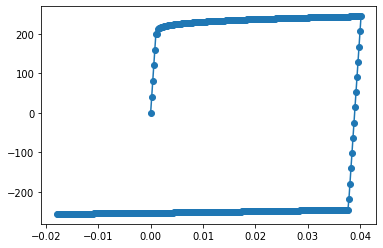

In [6]:
dat=np.loadtxt('elasto_plasticity_scalar_hardening.txt').T
plot(dat[2],dat[3],'-o')

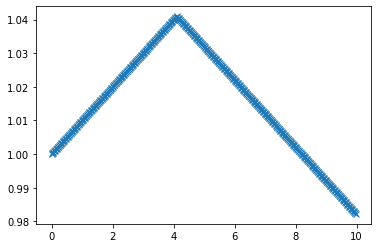

In [7]:
plot(dat[0],dat[1],'-x')

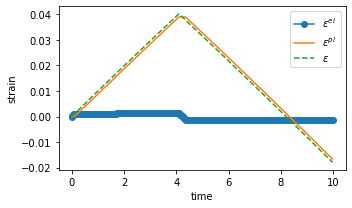

In [8]:
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)
ax.plot(dat[0],dat[4],'-o',label=r'$\varepsilon^{el}$')
ax.plot(dat[0],dat[5],'-',label=r'$\varepsilon^{pl}$')
ax.plot(dat[0],dat[2],'--',label=r'$\varepsilon$')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('strain')
fig.tight_layout()
fig.savefig('Strain_history.pdf',bbox_to_inches='tight')

## Hollomon equation

In [9]:
def hollomon(eps,K,n):
    return K*(eps)**n

(0, 657.0390457304651)

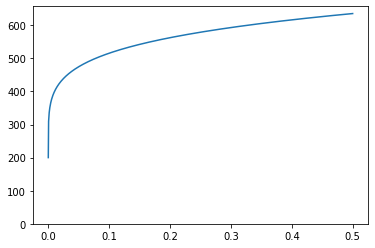

In [10]:
K=500.,
n=0.2
eps=np.linspace(0,0.5,1000)
plot(eps,200+hollomon(eps,K,n))
gca().set_ylim(0,)